In [1]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import numpy as np
from utils import get_ETRete_clear

from sklearn.preprocessing import StandardScaler, MinMaxScaler
ssc = MinMaxScaler()

from preprocessing import select_df_columns, df_interpolate_and_dropna
from models import evaluate_model, get_EXPO_model

In [2]:
%%time
path = "data/PotenzaTermicaOraria.csv"
df = get_ETRete_clear(path)

Wall time: 25.4 s


In [3]:
col = df.columns[0]

In [4]:
df_train = df[[col]][:"2019-10-08"]
df_test = df[[col]]["2019-10-09":]

In [5]:
# df_train[col] = ssc.fit_transform(df_train)
# #df_train[col] = ssc.transform(df_train)
# df_test[col] = ssc.transform(df_test.values.reshape(-1,1))

In [7]:
# df_test["2019-10-03"]

In [8]:
model = get_EXPO_model(df_train)

C:\Users\matte\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [9]:
model_2 = ExponentialSmoothing(df_train[col],
                            trend="add",
                            damped_trend=False,
                            seasonal="add",
                            seasonal_periods=24,
                            initialization_method='heuristic',
                            initial_level=None,
                            initial_trend=None,
                            initial_seasonal=None,
                            use_boxcox=None,
                            bounds=None,
                            dates=None,
                            freq="H",
                            missing='none')

In [10]:
periods = 48#24*7*4

In [11]:
test_predictions = model.forecast(periods)

In [12]:
# y_true = ssc.inverse_transform(df_test[col].iloc[:periods].values.reshape(1, -1))
y_true = df_test[col].iloc[:periods].values

In [13]:
# y_pred = ssc.inverse_transform(test_predictions.values.reshape(1, -1))
y_pred = test_predictions.values

In [20]:
df_train

,ET Rete
Orario,
2014-01-01 00:00:00,80.816667
2014-01-01 01:00:00,81.700000
2014-01-01 02:00:00,79.933333
2014-01-01 03:00:00,79.250000
2014-01-01 04:00:00,83.583333
...,...
2019-10-08 19:00:00,50.200000
2019-10-08 20:00:00,53.866667
2019-10-08 21:00:00,53.950000


In [21]:
y_true, y_pred

(array([51.4       , 51.56666667, 50.55      , 50.9       , 52.56666667,
        53.2       , 57.88333333, 60.58333333, 57.8       , 51.41666667,
        48.3       , 45.83333333, 47.06666667, 47.        , 46.46666667,
        46.31666667, 46.01666667, 51.58333333, 57.06666667, 60.01666667,
        66.5       , 67.01666667, 66.3       , 60.33333333, 57.18333333,
        51.68333333, 49.73333333, 51.15      , 50.66666667, 57.43333333,
        64.83333333, 60.83333333, 55.8       , 53.01666667, 51.56666667,
        50.66666667, 51.        , 54.98333333, 56.8       , 51.41666667,
        51.11666667, 52.7       , 55.08333333, 58.28333333, 59.41666667,
        56.7       , 52.61666667, 48.78333333]),
 array([48.80707829, 48.33929899, 48.90346205, 47.36948174, 45.83501523,
        47.99527107, 53.34550947, 53.62895534, 52.5993176 , 52.17526415,
        51.0203329 , 52.46978386, 50.61094308, 51.68332477, 50.40678166,
        50.61332342, 50.97036499, 51.94969449, 53.73254386, 57.13633589,
  

In [22]:
evaluate_model(y_true, y_pred)

mse = 24.700995144944084
r2_score = 0.17085053150175822
mape = 6.859413698932683
mae = 3.820705698356076


In [23]:
from models import get_model_metrics
get_model_metrics(y_true, y_pred)

(3.820705698356076, 6.859413698932683)

<AxesSubplot:>

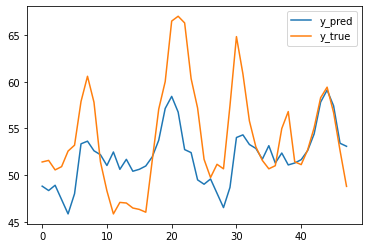

In [24]:
pd.DataFrame(np.concatenate((y_pred.reshape(-1,1), y_true.reshape(-1,1)), axis=1), columns=["y_pred", "y_true"]).plot()

<AxesSubplot:>

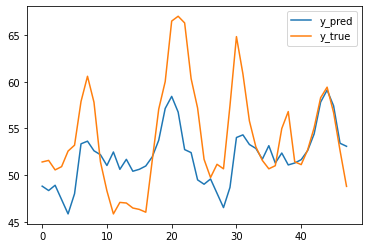

In [25]:
pd.DataFrame(np.concatenate((y_pred.reshape(-1,1), y_true.reshape(-1,1)), axis=1), columns=["y_pred", "y_true"]).plot()

In [26]:
evaluate_model(y_true, y_pred)

mse = 24.700995144944084
r2_score = 0.17085053150175822
mape = 6.859413698932683
mae = 3.820705698356076


In [ ]:
from datetime import datetime
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")

In [ ]:
now

In [ ]:
# model.save(f"models/{now}_EXPSMTH.pickle")

In [ ]:
# from joblib import dump
# dump(ssc, f'models/{now}_std_scaler.bin', compress=True)

In [33]:
model2 = ExponentialSmoothing(df_train,
                            trend="add",
                            damped_trend=False,
                            seasonal="add",
                            seasonal_periods=24,
                            initialization_method=None,
                            initial_level=None,
                            initial_trend=None,
                            initial_seasonal=None,
                            use_boxcox=None,
                            bounds=None,
                            dates=None,
                            freq="H",
                            missing='none')

C:\Users\matte\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [38]:
model2.from_formula(formula=model, data=df_train)

PatsyError: model is missing required outcome variables